# Challenge: Boston marathon
https://github.com/llimllib/bostonmarathon/tree/master/results/2014

There is a lot of information on runners and their performance for the Boston Marathon. Pick a year (post-2012 has more info) and do some clustering.

Specifically, use the tools at hand to determine which clustering solution, including number of clusters and algorithm used, is best for the marathon data. Once you have a solution you like, write a data story, including visualizations, where you teach the reader something about the Boston Marathon based on your clusters. Write up your report, including your process from start to finish, in a Jupyter notebook and submit it below.

In [75]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, MeanShift, SpectralClustering, AffinityPropagation, MiniBatchKMeans
from sklearn.cluster import estimate_bandwidth
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

%matplotlib inline

In [76]:
df=pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv')

In [77]:
df.head(10)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,NaN,...,28,5.37,NaN,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,NaN,...,4,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
7,30.48,"Geneti, Markos",5,76.95,M,29,129.83,5,5,NaN,...,5,4.97,NaN,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,NaN,...,3,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,NaN,...,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83


In [78]:
df.shape

(31984, 21)

In [79]:
df.nunique()

10k           2766
name         31915
division      6979
25k           6570
gender           2
age             64
official     11030
bib          31984
genderdiv    17575
ctz             84
35k           9516
overall      31931
pace           727
state           68
30k           8090
5k            1491
half          5651
20k           5375
country         78
city          5934
40k          10546
dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [81]:
df['ctz'].describe(), df['state'].describe()

(count     1244
 unique      84
 top        GBR
 freq       171
 Name: ctz, dtype: object, count     29408
 unique       68
 top          MA
 freq       7587
 Name: state, dtype: object)

In [82]:
drops=['ctz','name']
for d in drops:
    df.drop(d, axis=1, inplace=True)

In [83]:
nums=['10k','25k','30k','35k','5k','20k','40k','half']
for num in nums:
    df[num]=pd.to_numeric(df[num], errors='coerce')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 19 columns):
10k          31934 non-null float64
division     31984 non-null int64
25k          31768 non-null float64
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
35k          31950 non-null float64
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31944 non-null float64
5k           31932 non-null float64
half         31912 non-null float64
20k          31933 non-null float64
country      31984 non-null object
city         31983 non-null object
40k          31945 non-null float64
dtypes: float64(10), int64(4), object(5)
memory usage: 4.6+ MB


In [85]:
df.isnull().sum()

10k            50
division        0
25k           216
gender          0
age             0
official        0
bib             0
genderdiv       0
35k            34
overall         0
pace            0
state        2576
30k            40
5k             52
half           72
20k            51
country         0
city            1
40k            39
dtype: int64

In [86]:
df.dropna(inplace=True)

In [87]:
df.isnull().sum()

10k          0
division     0
25k          0
gender       0
age          0
official     0
bib          0
genderdiv    0
35k          0
overall      0
pace         0
state        0
30k          0
5k           0
half         0
20k          0
country      0
city         0
40k          0
dtype: int64

''

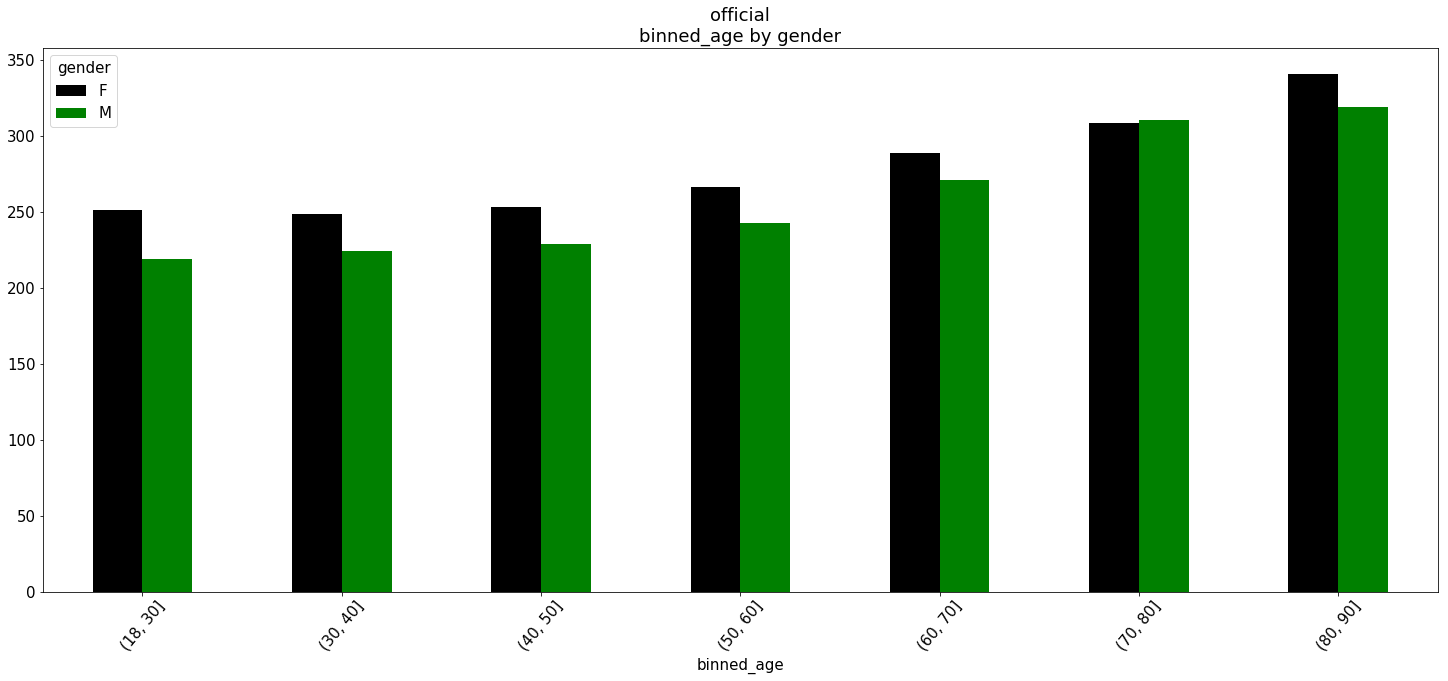

In [88]:
plt.rcParams.update({'font.size': 15})
bin = [18, 30, 40, 50, 60, 70, 80, 90,100]
df['binned_age'] = pd.cut(df['age'], bin)

daily_usage=df.pivot_table(index=('binned_age'),columns=('gender'),values=('official'), aggfunc='mean')

fig, ax = plt.subplots(1, 1, figsize=(25, 10))
daily_usage.plot(kind='bar', 
        align='center', width=.5, edgecolor='none',color='kg' 
       , ax=ax)

plt.title('official\nbinned_age by gender')
plt.xticks(rotation=50)
;

''

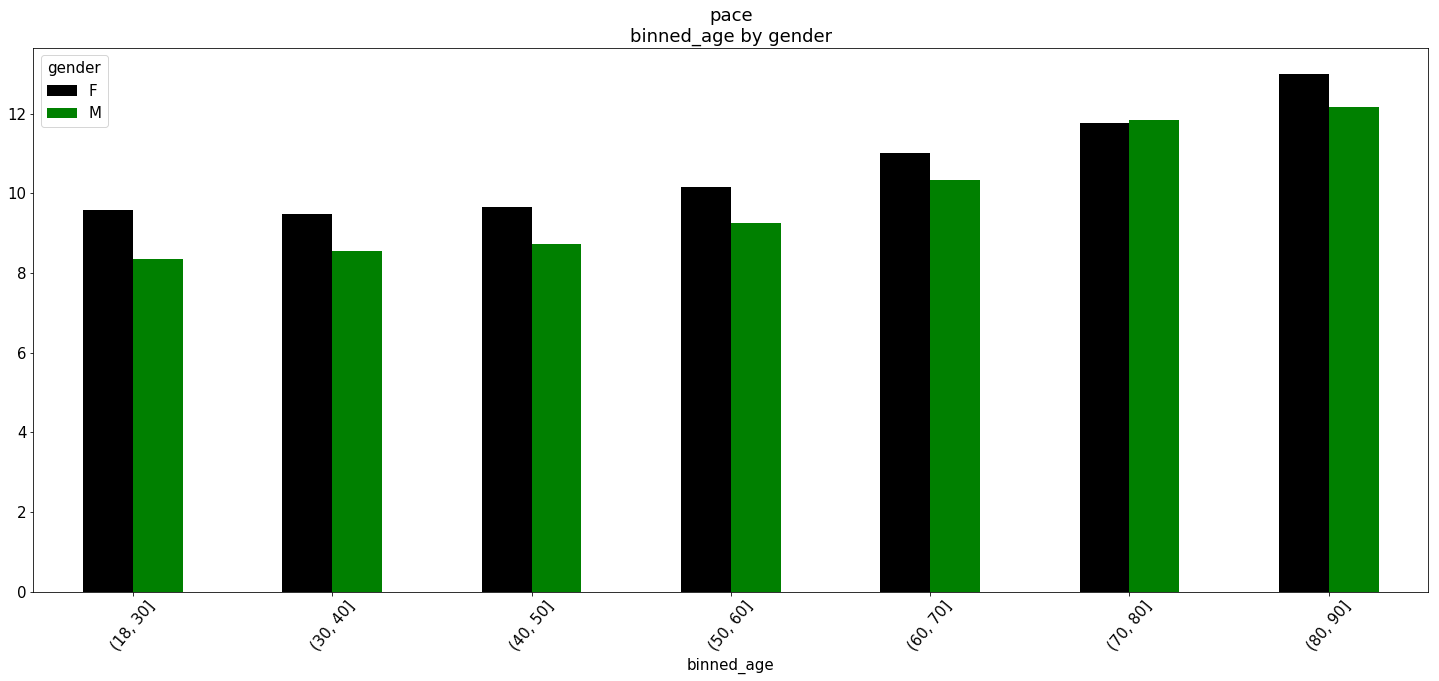

In [89]:
plt.rcParams.update({'font.size': 15})
bin = [18, 30, 40, 50, 60, 70, 80, 90,100]
df['binned_age'] = pd.cut(df['age'], bin)

daily_usage=df.pivot_table(index=('binned_age'),columns=('gender'),values=('pace'), aggfunc='mean')

fig, ax = plt.subplots(1, 1, figsize=(25, 10))
daily_usage.plot(kind='bar', 
        align='center', width=.5, edgecolor='none',color='kg' 
       , ax=ax)

plt.title('pace\nbinned_age by gender')
plt.xticks(rotation=50)
;

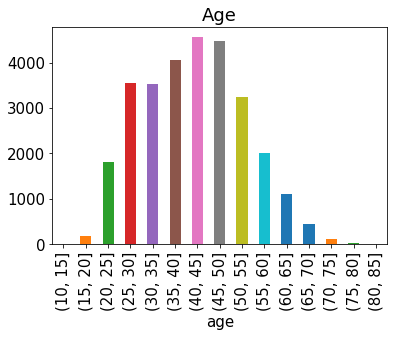

In [90]:
df['official'].groupby(pd.cut(df['age'], range(10,90,5))).aggregate(len).plot(kind = 'bar', title = 'Age')

In [91]:
categorical = df.select_dtypes(include=['object'])
categorical.head()

,gender,bib,state,country,city
9,M,6,CA,USA,Redding
14,M,W8,ON,CAN,Port Elgin
15,F,F8,MI,USA,Rochester Hills
24,M,W13,QC,CAN,St-Jean Baptiste
27,M,W14,IL,USA,Champaign


In [92]:
labE=LabelEncoder()
for cat in categorical:
    df[cat] = labE.fit_transform(df[cat])

In [93]:
numerical = df.select_dtypes(include=['float64','int64'])
numerical.head()

,10k,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
9,30.48,20,77.68,1,31,137.83,25615,20,112.27,20,5.27,9,94.78,15.15,65.23,61.78,1,3355,129.83
14,17.12,13,48.88,1,29,87.40,29102,13,72.83,13,3.35,48,60.82,8.02,40.20,38.02,0,3238,82.38
15,33.93,10,85.03,0,30,143.90,29068,10,119.68,46,5.50,29,102.40,16.92,71.68,67.92,1,3422,136.47
24,18.30,14,50.33,1,47,89.40,29077,14,74.95,14,3.42,53,62.33,8.67,41.80,39.63,0,3912,84.48
27,18.78,15,50.33,1,30,89.52,29078,15,75.02,15,3.42,20,62.72,8.98,41.82,39.65,1,662,84.75


In [94]:
df.corr()

,10k,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
10k,1.000000,0.480364,0.973384,-0.272918,0.161019,0.925319,0.042050,0.802213,0.943278,0.907614,0.925320,-0.121643,0.959450,0.990965,0.984823,0.986200,0.074328,-0.001070,0.929198
division,0.480364,1.000000,0.503092,-0.121124,-0.578437,0.526182,0.166637,0.477933,0.522138,0.521414,0.526218,-0.103984,0.512501,0.479270,0.492885,0.492377,0.129999,-0.046934,0.528792
25k,0.973384,0.503092,1.000000,-0.260696,0.150488,0.968523,0.054795,0.826844,0.984333,0.928652,0.968531,-0.122873,0.995399,0.951254,0.995803,0.994974,0.075529,0.002212,0.972259
gender,-0.272918,-0.121124,-0.260696,1.000000,0.204661,-0.201617,0.246441,0.173500,-0.227393,-0.243845,-0.201651,0.027776,-0.245778,-0.268911,-0.268602,-0.270131,-0.020397,0.001839,-0.208223
age,0.161019,-0.578437,0.150488,0.204661,1.000000,0.157196,-0.133065,0.296697,0.147957,0.192022,0.157170,0.037861,0.147977,0.152638,0.157517,0.157095,-0.124815,0.051328,0.151041
official,0.925319,0.526182,0.968523,-0.201617,0.157196,1.000000,0.062926,0.882578,0.993162,0.959527,0.999994,-0.121354,0.981501,0.903149,0.956845,0.954749,0.077309,0.007053,0.999383
bib,0.042050,0.166637,0.054795,0.246441,-0.133065,0.062926,1.000000,0.111106,0.062355,0.002531,0.062904,-0.056260,0.059023,0.042658,0.048818,0.048713,0.052456,-0.005275,0.063542
genderdiv,0.802213,0.477933,0.826844,0.173500,0.296697,0.882578,0.111106,1.000000,0.860340,0.907704,0.882584,-0.104774,0.841886,0.790902,0.818494,0.816652,0.056854,0.006830,0.877614
35k,0.943278,0.522138,0.984333,-0.227393,0.147957,0.993162,0.062355,0.860340,1.000000,0.948796,0.993168,-0.123082,0.993881,0.920396,0.973966,0.972154,0.076879,0.005358,0.995451
overall,0.907614,0.521414,0.928652,-0.243845,0.192022,0.959527,0.002531,0.907704,0.948796,1.000000,0.959550,-0.116800,0.937959,0.894327,0.923026,0.921762,0.069703,0.005509,0.957612


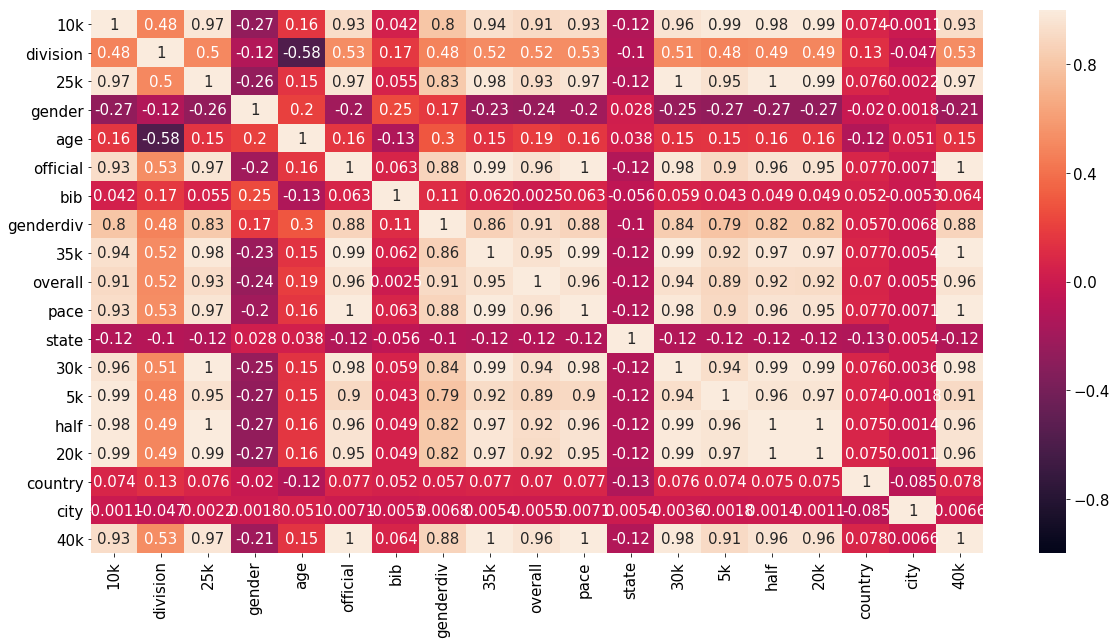

In [95]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,vmin=-1, annot = True)
plt.show()

In [96]:
df.head()

,10k,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k,binned_age
9,30.48,20,77.68,1,31,137.83,25615,20,112.27,20,5.27,9,94.78,15.15,65.23,61.78,1,3355,129.83,"(30, 40]"
14,17.12,13,48.88,1,29,87.40,29102,13,72.83,13,3.35,48,60.82,8.02,40.20,38.02,0,3238,82.38,"(18, 30]"
15,33.93,10,85.03,0,30,143.90,29068,10,119.68,46,5.50,29,102.40,16.92,71.68,67.92,1,3422,136.47,"(18, 30]"
24,18.30,14,50.33,1,47,89.40,29077,14,74.95,14,3.42,53,62.33,8.67,41.80,39.63,0,3912,84.48,"(40, 50]"
27,18.78,15,50.33,1,30,89.52,29078,15,75.02,15,3.42,20,62.72,8.98,41.82,39.65,1,662,84.75,"(18, 30]"


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29103 entries, 9 to 31983
Data columns (total 20 columns):
10k           29103 non-null float64
division      29103 non-null int64
25k           29103 non-null float64
gender        29103 non-null int64
age           29103 non-null int64
official      29103 non-null float64
bib           29103 non-null int64
genderdiv     29103 non-null int64
35k           29103 non-null float64
overall       29103 non-null int64
pace          29103 non-null float64
state         29103 non-null int64
30k           29103 non-null float64
5k            29103 non-null float64
half          29103 non-null float64
20k           29103 non-null float64
country       29103 non-null int64
city          29103 non-null int64
40k           29103 non-null float64
binned_age    29070 non-null category
dtypes: category(1), float64(10), int64(9)
memory usage: 5.7 MB


In [98]:
df.drop(['binned_age'], axis=1, inplace=True)
X=df.copy()

In [99]:
#X=df[['gender','age','pace','5k','10k','20k','25k','30k','35k','40k','half''official']]
X.head()

,10k,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
9,30.48,20,77.68,1,31,137.83,25615,20,112.27,20,5.27,9,94.78,15.15,65.23,61.78,1,3355,129.83
14,17.12,13,48.88,1,29,87.40,29102,13,72.83,13,3.35,48,60.82,8.02,40.20,38.02,0,3238,82.38
15,33.93,10,85.03,0,30,143.90,29068,10,119.68,46,5.50,29,102.40,16.92,71.68,67.92,1,3422,136.47
24,18.30,14,50.33,1,47,89.40,29077,14,74.95,14,3.42,53,62.33,8.67,41.80,39.63,0,3912,84.48
27,18.78,15,50.33,1,30,89.52,29078,15,75.02,15,3.42,20,62.72,8.98,41.82,39.65,1,662,84.75


In [100]:
# Make sure the number of rows divides evenly into four samples.
rows = X.shape[0] - X.shape[0] % 4
X = X.iloc[:rows, :]

In [101]:
type(X)

pandas.core.frame.DataFrame

In [102]:
X.shape

(29100, 19)

In [103]:
#sample 1/4th because running 29100 was taking a long time to run 
row = np.random.choice(X.index.values, 7275)
#row = np.random.choice(X.index.values, 1000)
sampled_X = X.ix[row]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [111]:
sc = StandardScaler()
sampled_X = sc.fit_transform(sampled_X)
type(sampled_X)

numpy.ndarray

In [105]:
X_norm=normalize(sampled_X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)
ypred = pd.DataFrame()

# comparing models
    - KMeans
    - MiniBatch
    - MeanShift
    - Spectral
    - Affinity

KMeans 
 col_0     0     1
row_0            
0      4128     0
1         0  3147 

clusters: 2 silhouette: 0.5209767700323464

MiniBatch 
 col_0     0     1
row_0            
0      3173    42
1         0  4060 

clusters: 2 silhouette: 0.5206125889312531

MeanShift 
 col_0     0     1     2     3
row_0                        
0      2510     0     0     0
1         0  1735     0     0
2         0     0  1637     0
3         0     0     0  1393 

clusters: 2 silhouette: 0.5722109517740213

Spectral 
 col_0     0     1
row_0            
0      4213     0
1         1  3061 

clusters: 2 silhouette: 0.5205918986684505

Affinity 
 col_0  0     1     2     3     4     5     6     7     8     9     ...   4814  \
row_0                                                              ...          
0         1     0     0     0     0     0     0     0     0     0  ...      0   
1         0     1     0     0     0     0     0     0     0     0  ...      0   
2         0     0     5     0     0     0

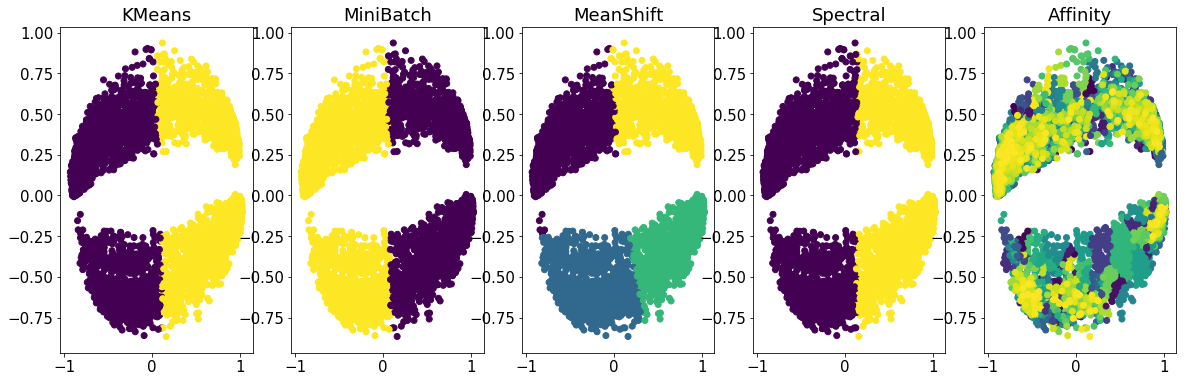

In [34]:
fig, ax = plt.subplots(1,5, figsize=(20,6))
models = []
names = []
plot_nums = []
silhouettes = []
clust=[]

def plotting(plot_num,labels,ypred):    
        silhouettes.append(silhouette)
        if plot_num<=2:
            ax[plot_num].scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
            silhouettes.append(silhouette)
            if plot_num==2:
                clusters=len(np.unique(labels))
                clust.append(clusters)
        elif plot_num==3:
            ax[plot_num].scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
            clusters=len(np.unique(labels))
            clust.append(clusters)
        else:
            ax[plot_num].scatter(X_pca[:, 0], X_pca[:, 1], c=ypred)
            silhouettes.append(silhouette)
            cluster_centers_indices = model.cluster_centers_indices_
            n_clusters=len(cluster_centers_indices)
            clust.append(n_clusters)
            

#for clusters in range(2,5):
clusters=2
bandwidth = estimate_bandwidth(X_pca, quantile=0.2, n_samples=500)
models.append((0,'KMeans', KMeans(n_clusters=clusters,init='k-means++',random_state=42)))
models.append((1,'MiniBatch', MiniBatchKMeans(init='random',n_clusters=clusters,batch_size=500)))
models.append((2,'MeanShift', MeanShift(bandwidth=bandwidth, bin_seeding=True)))
models.append((3,'Spectral', SpectralClustering(n_clusters=clusters)))
models.append((4,'Affinity', AffinityPropagation()))

for plot_num, name, model in models:  
    names.append(name)
    
    model.fit(X_pca)
    
    labels=model.labels_
    ypred = model.fit_predict(X_pca)
    
    silhouette = metrics.silhouette_score(X_pca, labels, metric='euclidean')
    silhouettes.append(silhouette)
    ax[plot_num].set_title(name)
    plotting(plot_num,labels,ypred) 
    
    print(name,'\n',pd.crosstab(ypred,labels),'\n')
    print('clusters: {} silhouette: {}\n'.format(clusters, silhouette))
    
    

KMeans 
 col_0     0     1     2
row_0                  
0      1910     0     0
1         0  2616     0
2         0     0  2749 

clusters: 3 silhouette: 0.5662951447310224

MiniBatch 
 col_0     0     1     2
row_0                  
0         0  1908     3
1        14     0  2603
2      2727    20     0 

clusters: 3 silhouette: 0.565972623628489

MeanShift 
 col_0     0     1     2     3
row_0                        
0      2510     0     0     0
1         0  1735     0     0
2         0     0  1637     0
3         0     0     0  1393 

clusters: 3 silhouette: 0.5722109517740213

Spectral 
 col_0     0     1     2
row_0                  
0      2522     0     0
1         0  2661     0
2         0     0  2092 

clusters: 3 silhouette: 0.5583643396238664



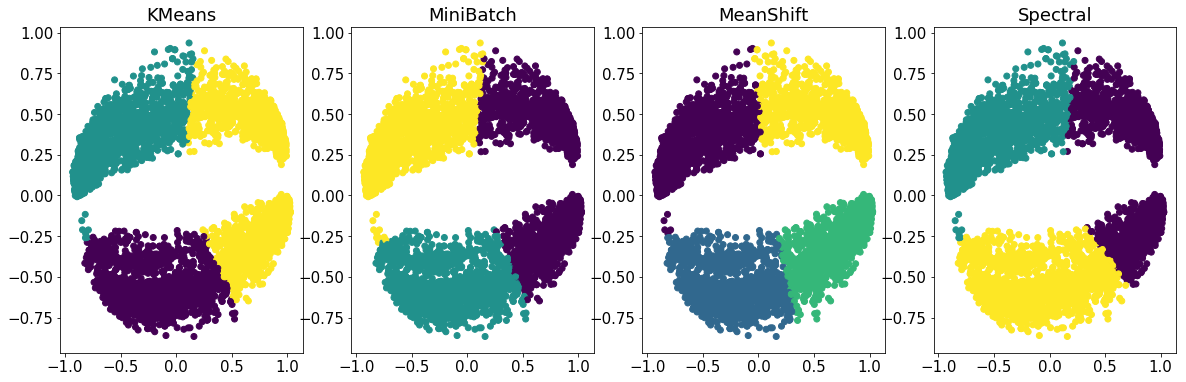

In [35]:
fig, ax = plt.subplots(1,4, figsize=(20,6))
models = []
names = []
plot_nums = []
silhouettes = []
clust=[]
silhouettes_df=[]
def plotting(plot_num,labels,ypred):    
        silhouettes.append(silhouette)
        if plot_num<=2:
            ax[plot_num].scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
            silhouettes.append(silhouette)
            if plot_num==2:
                clusters=len(np.unique(labels))
                clust.append(clusters)
        elif plot_num==3:
            ax[plot_num].scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
            clusters=len(np.unique(labels))
            clust.append(clusters)
        else:
            ax[plot_num].scatter(X_pca[:, 0], X_pca[:, 1], c=ypred)
            silhouettes.append(silhouette)
            cluster_centers_indices = model.cluster_centers_indices_
            n_clusters=len(cluster_centers_indices)
            clust.append(n_clusters)   
    
clusters=3
bandwidth = estimate_bandwidth(X_pca, quantile=0.2, n_samples=500)
models.append((0,'KMeans', KMeans(n_clusters=clusters,init='k-means++',random_state=42)))
models.append((1,'MiniBatch', MiniBatchKMeans(init='random',n_clusters=clusters,batch_size=500)))
models.append((2,'MeanShift', MeanShift(bandwidth=bandwidth, bin_seeding=True)))
models.append((3,'Spectral', SpectralClustering(n_clusters=clusters)))
#models.append((4,'Affinity', AffinityPropagation()))

for plot_num, name, model in models:  
    names.append(name)
    
    model.fit(X_pca)
    
    labels=model.labels_
    ypred = model.fit_predict(X_pca)
    
    silhouette = metrics.silhouette_score(X_pca, labels, metric='euclidean')
    silhouettes.append(silhouette)
    ax[plot_num].set_title(name)
    plotting(plot_num,labels,ypred) 
    
    print(name,'\n',pd.crosstab(ypred,labels),'\n')
    print('clusters: {} silhouette: {}\n'.format(clusters, silhouette))   

In [36]:
'''silhouettes_df=pd.DataFrame(silhouettes,columns=['silhouette'])
names_df=pd.DataFrame(names,columns=['Name'])
scores=pd.concat([names_df,silhouettes_df],axis=1)
scores.head()'''

"silhouettes_df=pd.DataFrame(silhouettes,columns=['silhouette'])\nnames_df=pd.DataFrame(names,columns=['Name'])\nscores=pd.concat([names_df,silhouettes_df],axis=1)\nscores.head()"

KMeans 
 col_0     0     1     2    3
row_0                       
0      1723     0     0    0
1         0  2295     0    0
2         0     0  2365    0
3         0     0     0  892 

clusters: 4 silhouette: 0.5043639044104967

MiniBatch 
 col_0     0     1     2    3
row_0                       
0       230     0   616   42
1         0   110  1898    0
2         0  1207     0  468
3      2343     0     0  361 

clusters: 4 silhouette: 0.48058204882805544

MeanShift 
 col_0     0     1     2
row_0                  
0      2567     0     0
1         0  2966     0
2         0     0  1742 

clusters: 4 silhouette: 0.5342466337915637

Spectral 
 col_0     0     1     2     3
row_0                        
0         0     0     0  1948
1         0     0  2116     0
2         0  1943     0     0
3      1266     0     0     2 

clusters: 4 silhouette: 0.4805671246857204



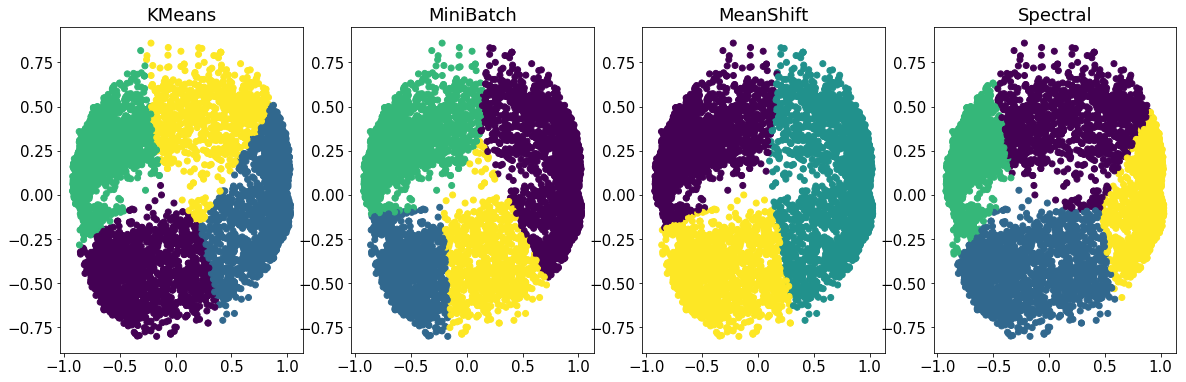

In [126]:
fig, ax = plt.subplots(1,4, figsize=(20,6))
models = []
names = []
plot_nums = []
silhouettes = []
clust=[]
silhouettes_df=[]
def plotting(plot_num,labels,ypred):    
        silhouettes.append(silhouette)
        if plot_num<=2:
            ax[plot_num].scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
            silhouettes.append(silhouette)
            if plot_num==2:
                clusters=len(np.unique(labels))
                clust.append(clusters)
        elif plot_num==3:
            ax[plot_num].scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
            clusters=len(np.unique(labels))
            clust.append(clusters)
        else:
            ax[plot_num].scatter(X_pca[:, 0], X_pca[:, 1], c=ypred)
            silhouettes.append(silhouette)
            cluster_centers_indices = model.cluster_centers_indices_
            n_clusters=len(cluster_centers_indices)
            clust.append(n_clusters)
            
clusters=4
bandwidth = estimate_bandwidth(X_pca, quantile=0.2, n_samples=500)
models.append((0,'KMeans', KMeans(n_clusters=clusters,init='k-means++',random_state=42)))
models.append((1,'MiniBatch', MiniBatchKMeans(init='random',n_clusters=clusters,batch_size=500)))
models.append((2,'MeanShift', MeanShift(bandwidth=bandwidth, bin_seeding=True)))
models.append((3,'Spectral', SpectralClustering(n_clusters=clusters)))
#models.append((4,'Affinity', AffinityPropagation()))

for plot_num, name, model in models:  
    names.append(name)
    
    model.fit(X_pca)
    
    labels=model.labels_
    ypred = model.fit_predict(X_pca)
    
    silhouette = metrics.silhouette_score(X_pca, labels, metric='euclidean')
    silhouettes.append(silhouette)
    ax[plot_num].set_title(name)
    plotting(plot_num,labels,ypred) 
    
    print(name,'\n',pd.crosstab(ypred,labels),'\n')
    print('clusters: {} silhouette: {}\n'.format(clusters, silhouette))    

In [107]:
'''from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier ## here;s the only i'm taking about -- go to anaconda prompt and type pip install xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel 
from sklearn.model_selection import GridSearchCV ## same as one we did for Decision trees and RF
from sklearn.model_selection import StratifiedKFold ## k fold cross validation.
from sklearn.preprocessing import LabelEncoder ##same as before.
import matplotlib.pyplot as pyplot'''

In [112]:
#y_female=X[X['gender_bin']== 0]
y_female.shape
#y_female= np.random.choice(y_female.index.values, 7275)

(7275,)

In [113]:
#y_male=X[X['gender_bin']== 1]
y_male.shape
#y_male= np.random.choice(y_male=.index.values, 7275)

(7275,)

In [ ]:
X=X.drop(['gender_bin'],axis=1)
X=np.random.choice(X.index.values, 7275)

In [68]:
#sample 1/4th because running 29100 was taking a long time to run 
row = np.random.choice(X.index.values, 7275)
#row = np.random.choice(X.index.values, 1000)
sampled_X = X.ix[row]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


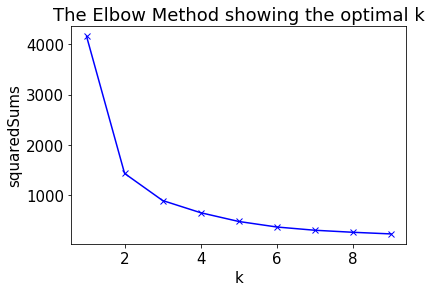

In [137]:
# k means determine k
from scipy.spatial.distance import cdist
from sklearn import metrics

squaredSums = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(X_pca)
    squaredSums.append(kmeans.inertia_)

# Plot the elbow
plt.plot(K, squaredSums, 'bx-')
plt.xlabel('k')
plt.ylabel('squaredSums')
plt.title('The Elbow Method showing the optimal k')
plt.show()

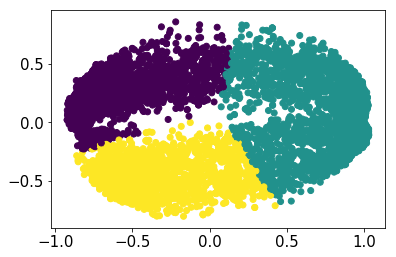

Comparing k-means clusters against the data:
col_0     0     1     2    3
row_0                       
0         0  2073     3  527
1      1948     0   239  739
2         0    43  1701    2


In [146]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, ypred))

In [149]:
y_pred['cluster groups'] = y_pred

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [142]:
cluster_dataframes = {}
for n_clust in range(4):
    clusters[n_clust] = X_pred.loc[X_pred['cluster_assignment'] == n_clust]

for name, frame in clusters.items():
    print(name)
    print('\n')
    print(frame.describe())

TypeError: 'int' object does not support item assignment

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sampled_X,y_female, test_size = 0.25, random_state=99)